Classification of text documents using sparse features

In [58]:
#classify documents by topics using a Bag of words approach
#uses a Tf-idf-weighted document-term sparse matrix to encode the features and demonistrate classifiers that can be handled sparse matrices.
"""
Load and vectorizing thye 20 newsgroups text dataset
18000 newsgroups post on 20 topics in two subsets 1. for training
                                                  2.for testing
"""
from time import time
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]


In [59]:
def size_mb(docs):
  return sum(len(s.encode("utf-8")) for s in docs) / 1e6

In [60]:
def load_dataset(verbose=False, remove=()):
  """ Load and vectorize the 20 newsgroups dataset."""
  data_train = fetch_20newsgroups(
    subset="train",
    categories=categories,
    shuffle=True,
    random_state=42,
    remove=remove,
  )
  data_test = fetch_20newsgroups(
      subset="test",
      categories=categories,
      shuffle=True,
      random_state=42,
      remove=remove,
  )

  #order of lables in targes_names can be diffrent from categories
  target_names = data_train.target_names

  # split target in a training set and a test set
  y_train,y_test = data_train.target, data_test.target

  # Etracting featuresfrom the train ing data using a sparse vectorizer
  t0 = time()
  vectorizer = TfidfVectorizer(
      sublinear_tf=True, max_df=0.5, stop_words="english"
  )
  X_train = vectorizer.fit_transform(data_train .data)
  duration_train = time() - t0

  # Extracting features from the test data using same vectorizer
  t0 = time()
  X_test = vectorizer.transform(data_test.data)
  duration_test = time() - t0

  feature_names = vectorizer.get_feature_names_out()
  if verbose:
    #compute size of loaded data
    data_train_size_mb = size_mb(data_train.data)
    data_test_size_mb = size_mb(data_test.data)

    print(
        f"{len(data_train.data)} documents - {data_train_size_mb:.2f}MB (training set)"
    )
    print(
        f"{len(data_test.data)} documents - {data_test_size_mb:.2f}MB (test set)")
    print(f"{len(target_names)} categories")
    print(
        f"vectorize training done in {duration_train:.3f}s "
        f" at {data_train_size_mb / duration_train:.3f}MB/s"
    )
    print(f"n_samples: {X_train.shape[0]}, n_features: {X_train.shape[1]}")
    print(
        f"vectorize testing done in {duration_test:.3f}s "
        f"at {data_test_size_mb / duration_test:.3f}MB/s"
    )
    print(f"n_samples: {X_test.shape[0]}, n_features: {X_test.shape[1]}")

  return X_train, X_test, y_train, y_test, feature_names, target_names

X_train, X_test, y_train, y_test, featurenames, target_names = load_dataset(
    verbose=True
)

2034 documents - 3.98MB (training set)
1353 documents - 2.87MB (test set)
4 categories
vectorize training done in 0.848s  at 4.691MB/s
n_samples: 2034, n_features: 33809
vectorize testing done in 0.507s at 5.653MB/s
n_samples: 1353, n_features: 33809


In [61]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

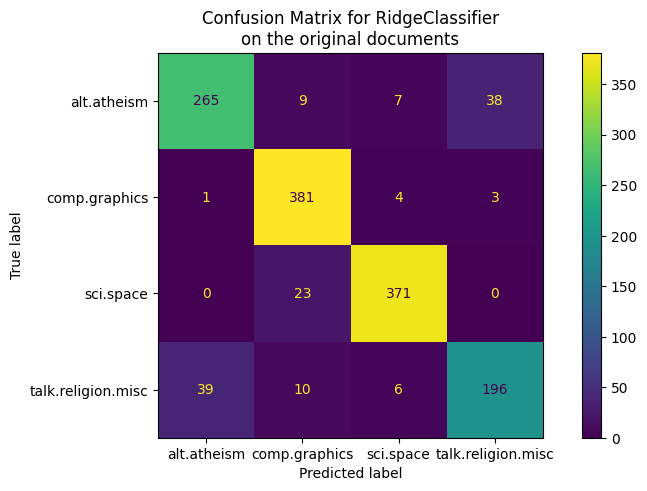

In [62]:
# confusion matrix of classifier to find if there is pattern in the classification errors
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(f"Confusion Matrix for {clf.__class__.__name__}\non the original documents")
